In [45]:
import pandas as pd
import numpy as np
import warnings 
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [6]:
## Q No. 1 :
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
# independent and dependent variables
X =df.iloc[:,:-1]
y=df.iloc[:,-1]

In [16]:
## Q No. 2 :
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

In [18]:
df.shape

(768, 9)

In [19]:
## Q No. 3 :
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [74]:
## Q No. 4 : 
from sklearn.tree import DecisionTreeRegressor

In [21]:
regressor =DecisionTreeRegressor()

In [57]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [25]:
y_pred = regressor.predict(X_test)
y_pred

array([1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 1.

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
parameter={
 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
  'max_features':['auto', 'sqrt', 'log2']
}

In [47]:
regrossorcv = GridSearchCV(regressor,param_grid=parameter,scoring="neg_mean_squared_error",cv=5)

In [48]:
regrossorcv

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [55]:
regrossorcv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [36]:
regrossorcv.predict(X_test)

array([0.41836735, 0.09090909, 0.09090909, 0.01123596, 0.5       ,
       0.41836735, 0.01123596, 0.41836735, 0.5       , 0.5       ,
       0.41836735, 0.91428571, 0.5       , 0.41836735, 0.09090909,
       0.5       , 0.09090909, 0.09090909, 0.58333333, 0.5       ,
       0.41836735, 0.41836735, 0.41836735, 0.09090909, 0.5       ,
       0.91428571, 0.01123596, 0.01123596, 0.09090909, 0.41836735,
       0.91428571, 0.5       , 0.91428571, 0.91428571, 0.41836735,
       0.5       , 0.91428571, 0.41836735, 0.41836735, 0.5       ,
       0.09090909, 0.16      , 0.41836735, 0.41836735, 0.01123596,
       0.91428571, 0.41836735, 0.09090909, 0.01123596, 0.91428571,
       0.01123596, 0.5       , 0.5       , 0.5       , 0.16      ,
       0.09090909, 0.91428571, 0.01123596, 0.09090909, 0.91428571,
       0.5       , 0.09090909, 0.16      , 0.41836735, 0.09090909,
       0.5       , 0.09090909, 0.5       , 0.01123596, 0.91428571,
       0.5       , 0.41836735, 0.01123596, 0.09090909, 0.01123

In [76]:
## Q No. 5 :
from sklearn.metrics import accuracy_score,classification_report

In [38]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.7047244094488189
              precision    recall  f1-score   support

         0.0       0.74      0.80      0.77       155
         1.0       0.64      0.56      0.59        99

    accuracy                           0.70       254
   macro avg       0.69      0.68      0.68       254
weighted avg       0.70      0.70      0.70       254



In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
confusion_matrix(y_test,y_pred)

array([[124,  44],
       [ 31,  55]])

In [41]:
from sklearn.metrics import roc_curve

In [44]:
roc_curve(y_test,y_pred)

(array([0.        , 0.26190476, 1.        ]),
 array([0.        , 0.63953488, 1.        ]),
 array([2., 1., 0.]))

In [52]:
regressor =DecisionTreeRegressor()

[Text(0.614875637755102, 0.9615384615384616, 'x[1] <= 154.5\nsquared_error = 0.229\nsamples = 514\nvalue = 0.354'),
 Text(0.32924107142857145, 0.8846153846153846, 'x[7] <= 30.5\nsquared_error = 0.191\nsamples = 432\nvalue = 0.257'),
 Text(0.1913265306122449, 0.8076923076923077, 'x[1] <= 127.5\nsquared_error = 0.12\nsamples = 251\nvalue = 0.139'),
 Text(0.12244897959183673, 0.7307692307692307, 'x[5] <= 45.45\nsquared_error = 0.077\nsamples = 203\nvalue = 0.084'),
 Text(0.11224489795918367, 0.6538461538461539, 'x[0] <= 6.5\nsquared_error = 0.065\nsamples = 200\nvalue = 0.07'),
 Text(0.10204081632653061, 0.5769230769230769, 'x[1] <= 104.5\nsquared_error = 0.061\nsamples = 199\nvalue = 0.065'),
 Text(0.04081632653061224, 0.5, 'x[4] <= 156.0\nsquared_error = 0.018\nsamples = 107\nvalue = 0.019'),
 Text(0.02040816326530612, 0.4230769230769231, 'x[3] <= 41.0\nsquared_error = 0.01\nsamples = 104\nvalue = 0.01'),
 Text(0.01020408163265306, 0.34615384615384615, 'squared_error = 0.0\nsamples = 97

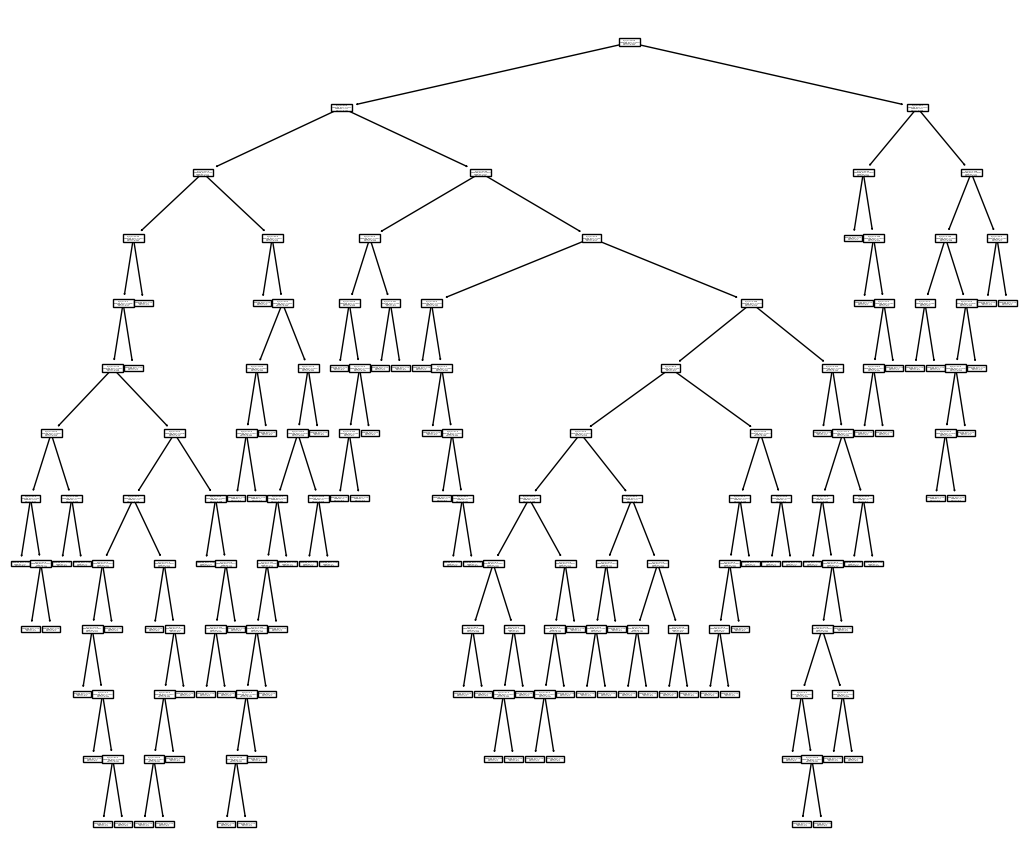

In [58]:
from sklearn import tree
plt.figure(figsize=(13,11))
tree.plot_tree(regressor)

In [60]:
regressor=DecisionTreeRegressor(criterion="squared_error",max_depth=4)

In [61]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4)

In [63]:
y_pred=regressor.predict(X_test)
y_pred

array([0.5785124 , 0.07      , 0.07      , 0.02941176, 0.5785124 ,
       0.5785124 , 0.07      , 0.5785124 , 0.5785124 , 0.5785124 ,
       0.5785124 , 0.95238095, 0.30232558, 0.5785124 , 0.07      ,
       0.07      , 0.07      , 0.07      , 0.        , 0.30232558,
       0.5785124 , 0.07      , 0.5785124 , 0.07      , 0.5785124 ,
       0.95238095, 0.07      , 0.07      , 1.        , 0.16666667,
       0.95238095, 0.5785124 , 0.95238095, 0.95238095, 0.5785124 ,
       0.5785124 , 0.95238095, 0.5785124 , 0.02941176, 1.        ,
       0.07      , 0.02941176, 0.5785124 , 0.5785124 , 0.07      ,
       0.95238095, 0.5785124 , 0.07      , 0.02941176, 0.95238095,
       0.07      , 0.5785124 , 0.5785124 , 0.30232558, 0.30232558,
       0.07      , 0.95238095, 0.07      , 0.07      , 0.5       ,
       0.5785124 , 0.07      , 0.02941176, 0.16666667, 0.07      ,
       0.30232558, 0.07      , 0.5785124 , 0.07      , 0.95238095,
       0.5785124 , 0.16666667, 0.02941176, 0.07      , 0.07   

[Text(0.5089285714285714, 0.9, 'x[1] <= 154.5\nsquared_error = 0.229\nsamples = 514\nvalue = 0.354'),
 Text(0.2857142857142857, 0.7, 'x[7] <= 30.5\nsquared_error = 0.191\nsamples = 432\nvalue = 0.257'),
 Text(0.14285714285714285, 0.5, 'x[1] <= 127.5\nsquared_error = 0.12\nsamples = 251\nvalue = 0.139'),
 Text(0.07142857142857142, 0.3, 'x[5] <= 45.45\nsquared_error = 0.077\nsamples = 203\nvalue = 0.084'),
 Text(0.03571428571428571, 0.1, 'squared_error = 0.065\nsamples = 200\nvalue = 0.07'),
 Text(0.10714285714285714, 0.1, 'squared_error = 0.0\nsamples = 3\nvalue = 1.0'),
 Text(0.21428571428571427, 0.3, 'x[2] <= 55.0\nsquared_error = 0.234\nsamples = 48\nvalue = 0.375'),
 Text(0.17857142857142858, 0.1, 'squared_error = 0.0\nsamples = 5\nvalue = 1.0'),
 Text(0.25, 0.1, 'squared_error = 0.211\nsamples = 43\nvalue = 0.302'),
 Text(0.42857142857142855, 0.5, 'x[5] <= 26.95\nsquared_error = 0.244\nsamples = 181\nvalue = 0.42'),
 Text(0.35714285714285715, 0.3, 'x[5] <= 9.8\nsquared_error = 0.05

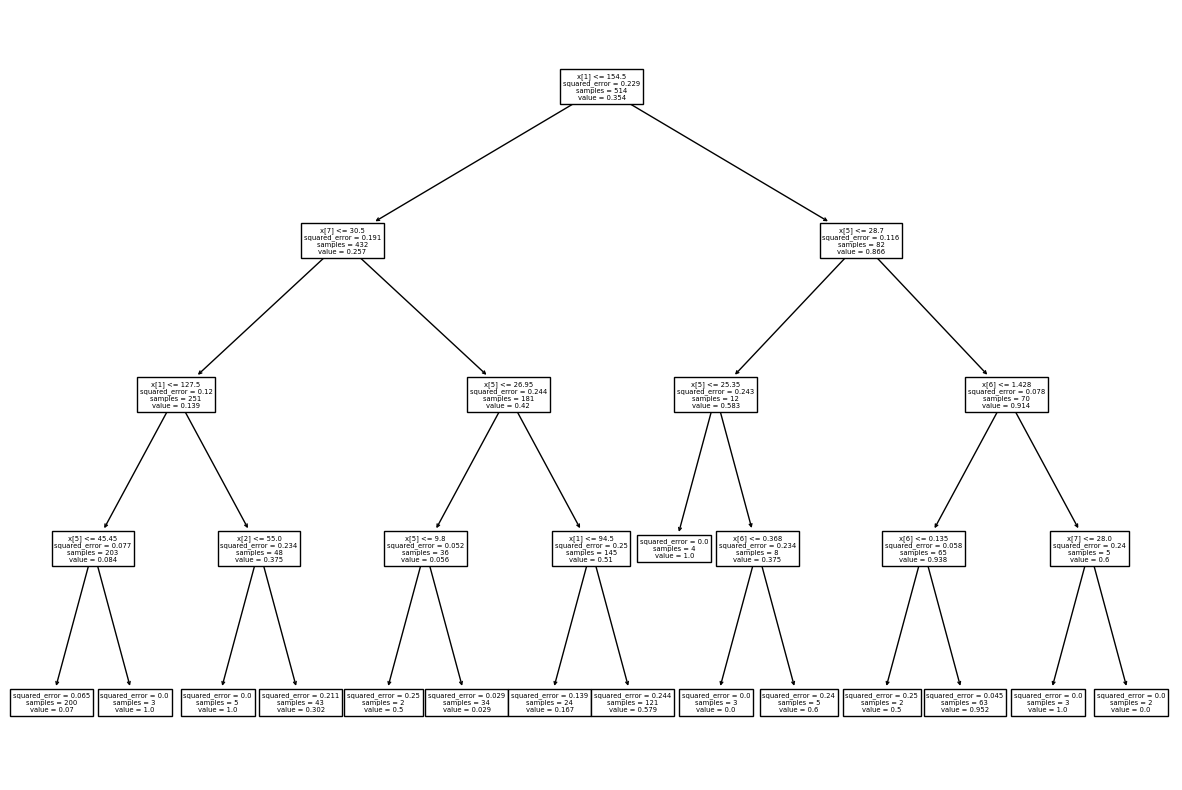

In [64]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(regressor)